<a href="https://colab.research.google.com/github/User28198/DS_tasks/blob/main/Chennai%20House%20Price%20Prediction/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv("/content/train-chennai-sale.csv")
df.info(verbose = False, memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Columns: 22 entries, PRT_ID to SALES_PRICE
dtypes: float64(6), int64(6), object(10)
memory usage: 5.0 MB


In [4]:
df.shape

(7109, 22)

In [5]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [7]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


Checking for duplicates

In [8]:
duplicates = df[df.duplicated()]
duplicates.size

0

**Inference:** No duplicates available

Dropping Unnecessary Columns

In [9]:
df.drop(['PRT_ID','REG_FEE' ,'COMMIS'], inplace = True, axis = 1 )
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


## **Exploratory Data Analysis**
<BR> 1. Missing values
<br> 2. Numerical features and its distribution
<br> 3. Categorical features and its cardinality
<br> 4. Outliers

### 1.Missing values 

In [10]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]
features_with_na

['N_BEDROOM', 'N_BATHROOM', 'QS_OVERALL']

In [11]:
for feature in features_with_na:
  print(feature, '-', df[feature].isnull().sum(), '-', np.round(df[feature].isnull().mean(), 4),'%')

N_BEDROOM - 1 - 0.0001 %
N_BATHROOM - 5 - 0.0007 %
QS_OVERALL - 48 - 0.0068 %


#### Handling Missing values

In [12]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace=True)

In [13]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace=True)

In [14]:
df['UTILITY_AVAIL'].fillna(df['UTILITY_AVAIL'].mode()[0],inplace=True)

### 2. Numerical features and its distribution

In [15]:
num_features = [features for features in df.columns if df[features].dtypes != 'O']
print('Number of Numerical Features: ', len(num_features))
df[num_features].head()

Number of Numerical Features:  10


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,7600000
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,21717770
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,13159200
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,9630290
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,7406250


#### 2.1. Discrete Numerical Features

In [16]:
dis_features = [feature for feature in num_features if len(df[feature].unique()) < 25]
print('Number of Discrete Numerical Features: ', len(dis_features))
df[dis_features].head()

Number of Discrete Numerical Features:  3


,N_BEDROOM,N_BATHROOM,N_ROOM
0,1.0,1.0,3
1,2.0,1.0,5
2,1.0,1.0,3
3,3.0,2.0,5
4,1.0,1.0,3


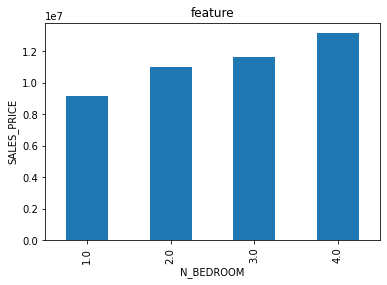

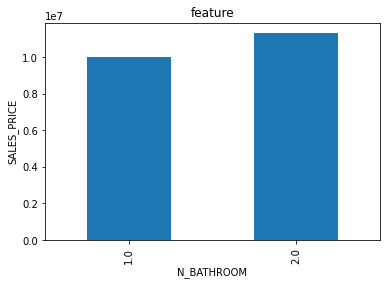

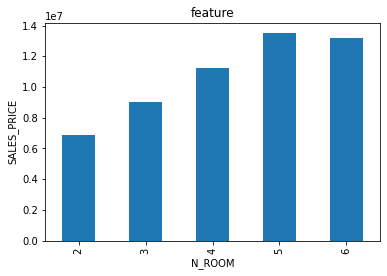

In [17]:
for feature in dis_features:
  data = df.copy()
  data.groupby(feature)['SALES_PRICE'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SALES_PRICE')
  plt.title('feature')
  plt.show()

**Inference:** As the number bedrooms/bathrooms/rooms increases, sales price increases

#### 2.2. Continuous Numerical Features

In [18]:
cont_features = [feature for feature in num_features if feature not in dis_features]
print('Number of Continuous Numerical Features: ', len(cont_features))
df[cont_features].head()

Number of Continuous Numerical Features:  7


,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,1004,131,4.0,3.9,4.9,4.330,7600000
1,1986,26,4.9,4.2,2.5,3.765,21717770
2,909,70,4.1,3.8,2.2,3.090,13159200
3,1855,14,4.7,3.9,3.6,4.010,9630290
4,1226,84,3.0,2.5,4.1,3.290,7406250


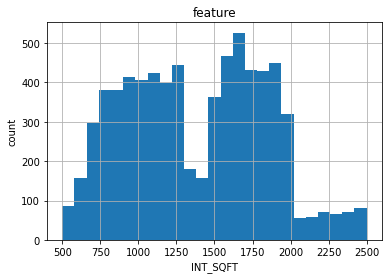

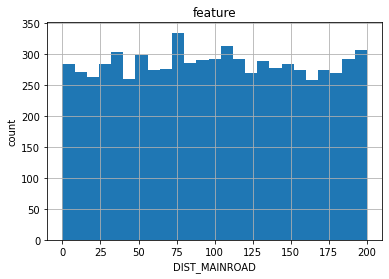

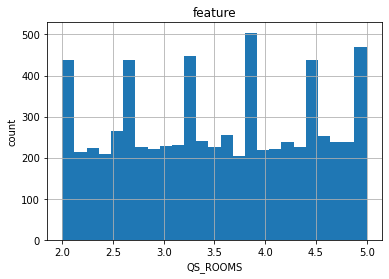

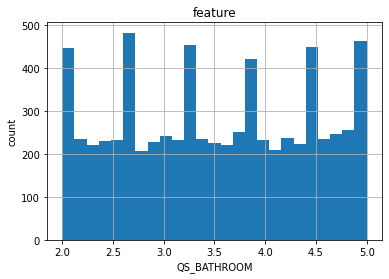

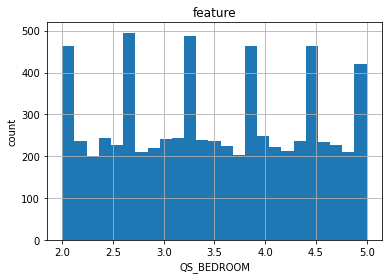

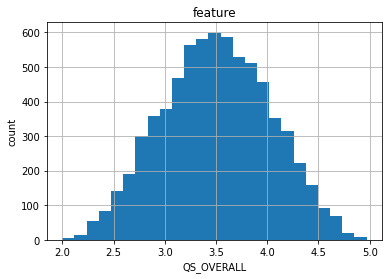

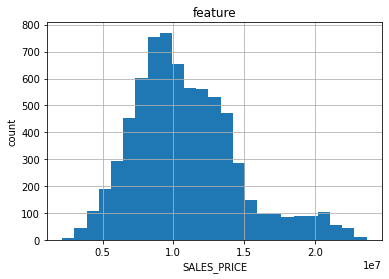

In [19]:
for feature in cont_features:
  data1 = df.copy()
  data1[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title('feature')
  plt.show()

#### Relationship between Continuous features and target variable

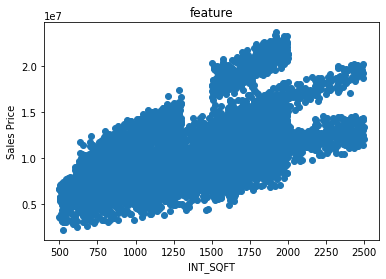

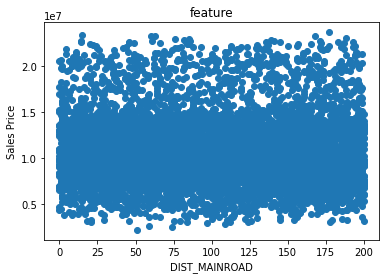

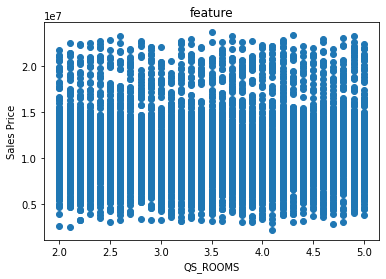

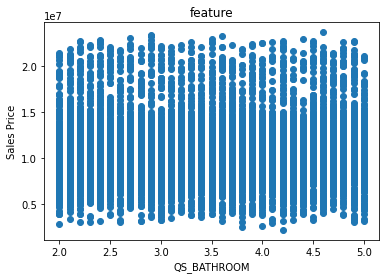

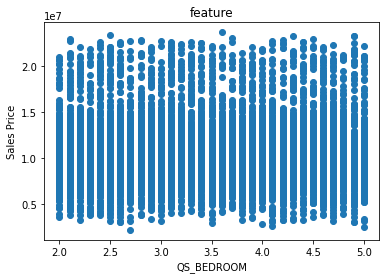

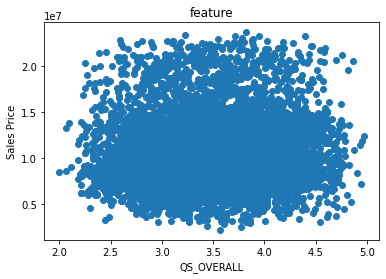

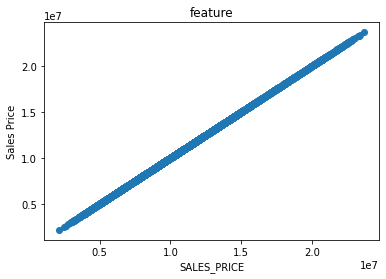

In [20]:
for feature in cont_features:
  data1 = df.copy()
  plt.scatter(data1[feature], data1['SALES_PRICE'])
  plt.xlabel(feature)
  plt.ylabel('Sales Price')
  plt.title('feature')
  plt.show()

**Inference**: The following fields have no significant relationship with the target variable
<br> DIST_MAINROAD, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL

In [21]:
df.drop(['DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'], inplace = True, axis = 1)

####Skewness

In [22]:
#High Skew     : skew > 1 or skew < -1 
#Moderate Skew : skew is in between 0.5 and 1 (or) -0.5 and -1
#Fairly Symmetry : skew is in between -0.5 and 0.5

def cont_features_skew(x):
    if x > 1:
        return "High positive skew"
    elif x > 0.5:
        return "Moderate positive skew"
    elif x > -0.5:
        return "No skew"
    elif x > -1:
        return "Moderate negative skew"
    else:
        return "High negative skew"

skewness = np.round(df['INT_SQFT'].skew(), 4)
print(skewness, '>>', cont_features_skew(skewness))

0.1312 >> No skew


**Inference:** As the features are fairly symmetrical, no transformation is required

#### Outliers

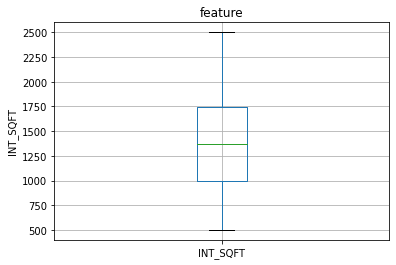

In [23]:
df.boxplot(column = 'INT_SQFT')
plt.ylabel('INT_SQFT')
plt.title('feature')
plt.show()

**Inference**: No outliers available

### 3. Categorical Features and its cardinality

In [24]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of Categorical Features: ', len(cat_features))
df[cat_features].head()

Number of Categorical Features:  9


,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,Karapakkam,04-05-2011,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A
1,Anna Nagar,19-12-2006,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH
2,Adyar,04-02-2012,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL
3,Velachery,13-03-2010,Family,No,18-03-1988,Others,NoSewr,Paved,I
4,Karapakkam,05-10-2009,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C


In [25]:
cat_features.remove('DATE_SALE')
cat_features.remove('DATE_BUILD')
df[cat_features].head()

,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,Karapakkam,AbNormal,Yes,Commercial,AllPub,Paved,A
1,Anna Nagar,AbNormal,No,Commercial,AllPub,Gravel,RH
2,Adyar,AbNormal,Yes,Commercial,ELO,Gravel,RL
3,Velachery,Family,No,Others,NoSewr,Paved,I
4,Karapakkam,AbNormal,Yes,Others,AllPub,Gravel,C


In [26]:
for feature in cat_features:
  print('*',feature,'*')
  print(df[feature].unique())

* AREA *
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
* SALE_COND *
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
* PARK_FACIL *
['Yes' 'No' 'Noo']
* BUILDTYPE *
['Commercial' 'Others' 'Other' 'House' 'Comercial']
* UTILITY_AVAIL *
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
* STREET *
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
* MZZONE *
['A' 'RH' 'RL' 'I' 'C' 'RM']


#### Correcting Misspellings

In [27]:
df['AREA'].replace({'Chrompt':'Chrompet', 'Chrmpet':'Chrompet', 'Chormpet':'Chrompet', 'TNagar':'T Nagar', 'Karapakam':'Karapakkam', 'Ana Nagar':'Anna Nagar',
            'Velchery':'Velachery', 'Ann Nagar':'Anna Nagar', 'Adyr':'Adyar', 'KKNagar':'KK Nagar'}, inplace = True)
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [28]:
df['SALE_COND'].replace({'AdjLand': 'Adj Land', 'Ab Normal':'Abnormal', 'AbNormal':'Abnormal', 'Partiall':'Partial', 'PartiaLl':'Partial'}, inplace = True)
df['SALE_COND'].value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
Abnormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [29]:
df['PARK_FACIL'].replace({'Noo':'No'}, inplace = True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [30]:
df['BUILDTYPE'].replace({'Other':'Others', 'Comercial':'Commercial'}, inplace = True)
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [31]:
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'}, inplace = True)
df['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [32]:
df['STREET'].replace({'Pavd':'Paved', 'NoAccess':'No Access'}, inplace = True)
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

#### Relationship between Categorical features and target variable

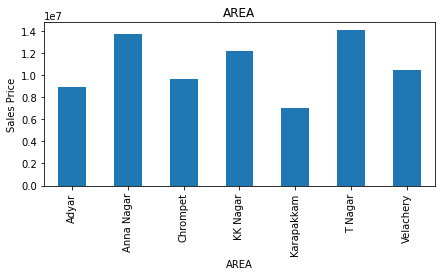

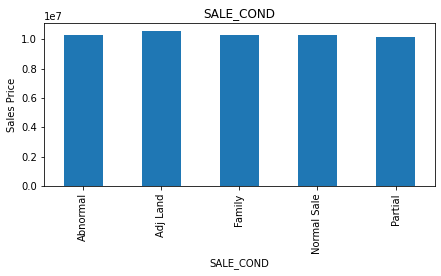

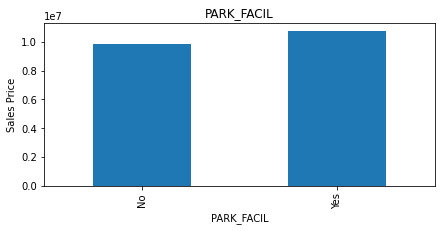

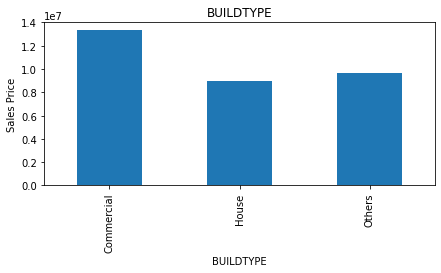

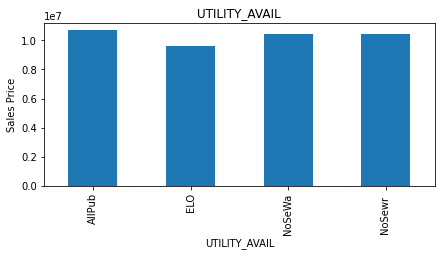

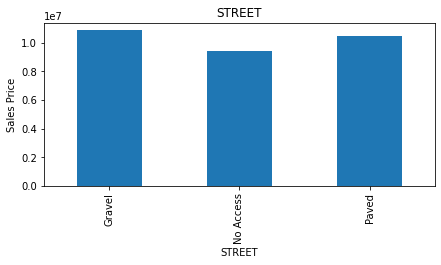

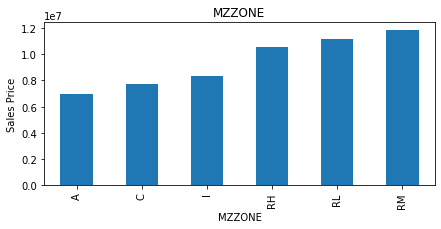

In [33]:
for feature in cat_features:
  plt.figure(figsize=(7, 3))
  data = df.copy()
  data.groupby(feature)['SALES_PRICE'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Sales Price')
  plt.title(feature)
  plt.show()

**Inference** : SALE_COND has no significant relation with the target variable

In [34]:
df.drop('SALE_COND', inplace = True, axis = 1)

### 4. Temporal variable

Text(0.5, 1.0, 'Year Sold vs Sales Price of House')

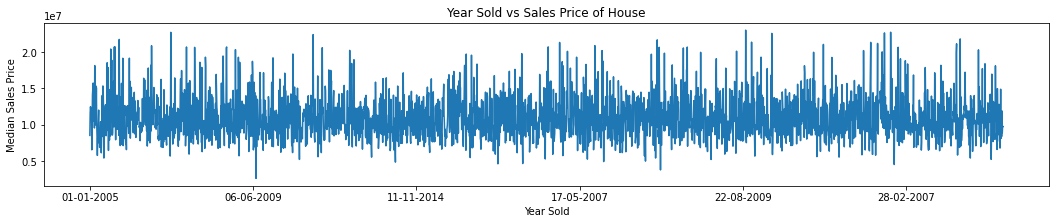

In [35]:
plt.figure(figsize=(18, 3))
df.groupby('DATE_SALE')['SALES_PRICE'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median Sales Price')
plt.title('Year Sold vs Sales Price of House')

Text(0.5, 1.0, 'Year Built vs Sales Price of House')

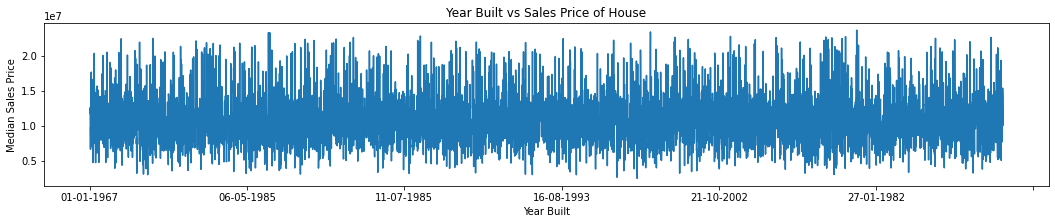

In [36]:
plt.figure(figsize=(18, 3))
df.groupby('DATE_BUILD')['SALES_PRICE'].median().plot()
plt.xlabel('Year Built')
plt.ylabel('Median Sales Price')
plt.title('Year Built vs Sales Price of House')

In [37]:
df['AGE'] = (pd.to_datetime(df['DATE_SALE']).dt.year - pd.to_datetime(df['DATE_BUILD']).dt.year).astype(int)

In [38]:
df.drop(['DATE_BUILD', 'DATE_SALE'], inplace = True, axis = 1)

In [39]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,Karapakkam,1004,1.0,1.0,3,Yes,Commercial,AllPub,Paved,A,7600000,44
1,Anna Nagar,1986,2.0,1.0,5,No,Commercial,AllPub,Gravel,RH,21717770,11
2,Adyar,909,1.0,1.0,3,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3.0,2.0,5,No,Others,NoSewr,Paved,I,9630290,22
4,Karapakkam,1226,1.0,1.0,3,Yes,Others,AllPub,Gravel,C,7406250,30


## **Encoding**

### Label Encoding for Ordinal Categorical features

In [40]:
df['PARK_FACIL'] = df['PARK_FACIL'].map({'Yes':1, 'No':0})
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].map({'ELO':0, 'NoSewr ':1, 'NoSeWa':2, 'AllPub':3})     #Space after 'NoSewr '
df['STREET'] = df['STREET'].map({'No Access':0, 'Paved':1, 'Gravel':2})
df['MZZONE'] = df.MZZONE.map({'A':0, 'C':1, 'I':2, 'RH':4, 'RL':5, 'RM':6})

### One Hot Encoding for Nominal Categorical features


In [41]:
df = pd.get_dummies(df, columns = ['AREA'])
df.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery
0,1004,1.0,1.0,3,1,Commercial,3,1,0,7600000,44,0,0,0,0,1,0,0
1,1986,2.0,1.0,5,0,Commercial,3,2,4,21717770,11,0,1,0,0,0,0,0
2,909,1.0,1.0,3,1,Commercial,0,2,5,13159200,20,1,0,0,0,0,0,0
3,1855,3.0,2.0,5,0,Others,1,1,2,9630290,22,0,0,0,0,0,0,1
4,1226,1.0,1.0,3,1,Others,3,2,1,7406250,30,0,0,0,0,1,0,0


In [42]:
df = pd.get_dummies(df, columns = ['BUILDTYPE'])
df.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1004,1.0,1.0,3,1,3,1,0,7600000,44,0,0,0,0,1,0,0,1,0,0
1,1986,2.0,1.0,5,0,3,2,4,21717770,11,0,1,0,0,0,0,0,1,0,0
2,909,1.0,1.0,3,1,0,2,5,13159200,20,1,0,0,0,0,0,0,1,0,0
3,1855,3.0,2.0,5,0,1,1,2,9630290,22,0,0,0,0,0,0,1,0,0,1
4,1226,1.0,1.0,3,1,3,2,1,7406250,30,0,0,0,0,1,0,0,0,0,1


## **Memory Optimisation**

In [43]:
df.isna().any()

INT_SQFT                False
N_BEDROOM               False
N_BATHROOM              False
N_ROOM                  False
PARK_FACIL              False
UTILITY_AVAIL           False
STREET                  False
MZZONE                  False
SALES_PRICE             False
AGE                     False
AREA_Adyar              False
AREA_Anna Nagar         False
AREA_Chrompet           False
AREA_KK Nagar           False
AREA_Karapakkam         False
AREA_T Nagar            False
AREA_Velachery          False
BUILDTYPE_Commercial    False
BUILDTYPE_House         False
BUILDTYPE_Others        False
dtype: bool

In [44]:
df.dtypes

INT_SQFT                  int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
PARK_FACIL                int64
UTILITY_AVAIL             int64
STREET                    int64
MZZONE                    int64
SALES_PRICE               int64
AGE                       int64
AREA_Adyar                uint8
AREA_Anna Nagar           uint8
AREA_Chrompet             uint8
AREA_KK Nagar             uint8
AREA_Karapakkam           uint8
AREA_T Nagar              uint8
AREA_Velachery            uint8
BUILDTYPE_Commercial      uint8
BUILDTYPE_House           uint8
BUILDTYPE_Others          uint8
dtype: object

In [45]:
df.info(verbose = False, memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Columns: 20 entries, INT_SQFT to BUILDTYPE_Others
dtypes: float64(2), int64(8), uint8(10)
memory usage: 624.9 KB


In [46]:
df['INT_SQFT'] = df['INT_SQFT'].astype(np.int16)
df['N_BEDROOM'] = df['N_BEDROOM'].astype(np.int8)
df['N_BATHROOM'] = df['N_BATHROOM'].astype(np.int8)
df['N_ROOM'] = df['N_ROOM'].astype(np.int8)
df['PARK_FACIL'] = df['PARK_FACIL'].astype(np.int8)
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].astype(np.int8)
df['STREET'] = df['STREET'].astype(np.int8)
df['MZZONE'] = df['MZZONE'].astype(np.int8)
df['AGE'] = df['AGE'].astype(np.int8)
df['SALES_PRICE'] = df['SALES_PRICE'].astype(np.int32)

In [47]:
df.info(verbose = False, memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Columns: 20 entries, INT_SQFT to BUILDTYPE_Others
dtypes: int16(1), int32(1), int8(8), uint8(10)
memory usage: 166.7 KB


In [48]:
df.dtypes

INT_SQFT                int16
N_BEDROOM                int8
N_BATHROOM               int8
N_ROOM                   int8
PARK_FACIL               int8
UTILITY_AVAIL            int8
STREET                   int8
MZZONE                   int8
SALES_PRICE             int32
AGE                      int8
AREA_Adyar              uint8
AREA_Anna Nagar         uint8
AREA_Chrompet           uint8
AREA_KK Nagar           uint8
AREA_Karapakkam         uint8
AREA_T Nagar            uint8
AREA_Velachery          uint8
BUILDTYPE_Commercial    uint8
BUILDTYPE_House         uint8
BUILDTYPE_Others        uint8
dtype: object

## **Applying ML Models**

### Splitting the data

In [49]:
X = df.drop('SALES_PRICE',axis=1)
y = df['SALES_PRICE'].values

In [50]:
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.2)

In [51]:
X_train.shape

(5687, 19)

### Standardization

In [52]:
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [54]:
y_pred = lin_reg.predict(X_test_scaled)
y_pred

array([ 7722097.83552764,  9791336.80367233, 13416094.78759729, ...,
        9261675.38352513, 10520471.98108007, 11737387.48102509])

In [55]:
lr_acc = r2_score(y_test,y_pred)
print('R2 SCORE:', lr_acc)

R2 SCORE: 0.9523352887841102


### K-Nearest Neighbours

In [56]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i)
  knn.fit(X_train_scaled,y_train) 
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))


K value  :  1  train score :  0.9999969743770203  score :  0.9554810028542688
K value  :  2  train score :  0.9892234376687203  score :  0.9633179161656045
K value  :  3  train score :  0.9845804053645743  score :  0.9656334312469121
K value  :  4  train score :  0.9815895904939359  score :  0.96629604940604
K value  :  5  train score :  0.9794295715679979  score :  0.9661840063093049
K value  :  6  train score :  0.9778589836116961  score :  0.9657210573996977
K value  :  7  train score :  0.976317828009286  score :  0.9652622391513639
K value  :  8  train score :  0.9747822784731496  score :  0.9646724003720071
K value  :  9  train score :  0.9736775750583311  score :  0.9638504546864223
K value  :  10  train score :  0.9725334162933433  score :  0.9631132879764899
K value  :  20  train score :  0.9630273395568429  score :  0.9560576190398589
K value  :  50  train score :  0.9460811762802661  score :  0.9404511001755644


In [57]:
knn = KNeighborsRegressor(5)
knn.fit(X_train_scaled,y_train)
knn_acc = knn.score(X_test_scaled,y_test)
knn_acc

0.9708715385213379

### Decision Tree

In [58]:
dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=4)

In [59]:
y_pred = dt.predict(X_test_scaled)
y_pred

array([ 9239606.24612203,  9239606.24612203, 13335360.83762887, ...,
        9239606.24612203, 12336639.50601375, 12336639.50601375])

In [60]:
dt_acc = r2_score(y_test,y_pred)
print('R2 SCORE:', dt_acc)

R2 SCORE: 0.8399909185171495


### Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [62]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt')

In [63]:
y_pred = rf.predict(X_test_scaled) 
y_pred

array([ 9696260.48751506,  9808053.17246469, 11549346.76303549, ...,
        9798662.14736407, 10099118.17333093, 12298836.07874272])

In [64]:
rfr_acc = r2_score(y_test,y_pred)
print('R2 SCORE:', rfr_acc)

R2 SCORE: 0.8346858689629274


### eXtreme Gradient Boost (XGBoost)

In [65]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train_scaled,y_train)
  model.score(X_test_scaled, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled,y_train)))


Learning rate :  0.01  Train score :  -0.3346039850760858  Cross-Val score :  -0.3454619316694153
Learning rate :  0.02  Train score :  0.7989860348677222  Cross-Val score :  0.7908458654212637
Learning rate :  0.03  Train score :  0.9617363762070109  Cross-Val score :  0.9557325792738002
Learning rate :  0.04  Train score :  0.9879331773199661  Cross-Val score :  0.98270025640041
Learning rate :  0.05  Train score :  0.993521222987087  Cross-Val score :  0.9888432205120324
Learning rate :  0.06  Train score :  0.995233073608724  Cross-Val score :  0.9907479432473817
Learning rate :  0.07  Train score :  0.996017524783534  Cross-Val score :  0.9917556708833217
Learning rate :  0.08  Train score :  0.9965784018371284  Cross-Val score :  0.9922369530139807
Learning rate :  0.09  Train score :  0.996803901543994  Cross-Val score :  0.9926062751759712
Learning rate :  0.1  Train score :  0.9970732656045577  Cross-Val score :  0.9927245458256092
Learning rate :  0.11  Train score :  0.99714

In [66]:
model = xgb.XGBRegressor(learning_rate = 0.13, n_estimators=100)
model.fit(X_train_scaled,y_train)
xgb_acc = model.score(X_test_scaled, y_test)
xgb_acc

0.9944184751402337

### Model Comparison

In [67]:
results = pd.DataFrame([
    ['Linear Regression', lr_acc],
    ['K-Nearest Neighbour', knn_acc],
    ['Decision Tree', dt_acc],
    ['Random Forest Regressor', rfr_acc],
    ['XG Boost', xgb_acc]
                      ], columns = ['ML Models', 'Accuracy Score']).sort_values(by = 'Accuracy Score', ascending = False)
results.style.background_gradient(cmap='Blues')

,ML Models,Accuracy Score
4,XG Boost,0.994418
1,K-Nearest Neighbour,0.970872
0,Linear Regression,0.952335
2,Decision Tree,0.839991
3,Random Forest Regressor,0.834686


## **Feature Importance**

### Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

rf = RandomForestRegressor()

In [69]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
for feature, importance in feature_importances:
    print(feature, ":", importance)

N_BEDROOM : 0.0
N_BATHROOM : 0.0
N_ROOM : 0.0
UTILITY_AVAIL : 0.0
AREA_Adyar : 0.0
AREA_Chrompet : 0.0
BUILDTYPE_House : 0.0
BUILDTYPE_Others : 0.0
PARK_FACIL : 0.01
STREET : 0.01
AGE : 0.01
AREA_Anna Nagar : 0.01
AREA_KK Nagar : 0.01
AREA_T Nagar : 0.01
AREA_Velachery : 0.02
AREA_Karapakkam : 0.07
MZZONE : 0.11
BUILDTYPE_Commercial : 0.31
INT_SQFT : 0.4


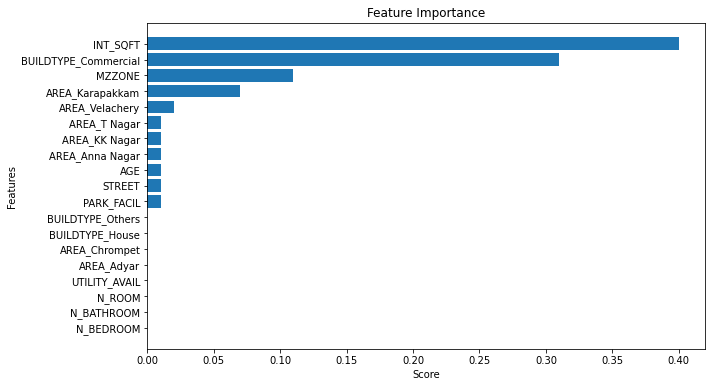

In [71]:
# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in feature_importances], [x[1] for x in feature_importances])
plt.title("Feature Importance")
plt.xlabel("Score")
plt.ylabel("Features")
plt.show()